# Заглянем глубже: метод опорных векторов
Метод опорных векторов (support vector machines, SVMs) - очень мощный и гибкий класс алгоритмов обучения с учителем как для классификации, так и регрессии.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Используем настройки по умолчанию библиотеки seaborn
import seaborn as sns; sns.set()

## Основания для использования метода опорных векторов
Рассмотрим *разделяющую классификацию* (discriminative classification). Вместо моделирования каждого из классов мы найдем прямую или кривую (в двумерном пространстве), отделяющую классы друг от друга. В качестве примера рассмотрим простой случай задачи классификации, в котором два класса точек вполне раздельны:

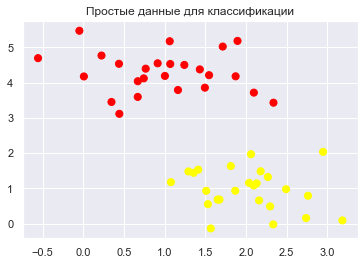

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.title('Простые данные для классификации');

Линейный разделяющий классификатор попытается провести прямую линию, разделяющую два набора данных, создав таким образом модель для классификации. Можем попробовать разделить эти данные вручную, но сразу возникает проблема:
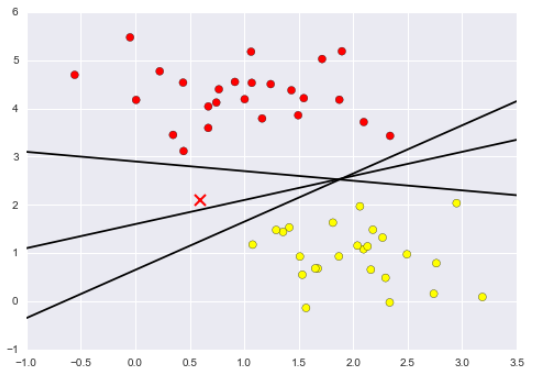
существует более одной идеально разделяющей два класса прямой!
## Метод опорных векторов: максимизируем отступ
Метод опорных векторов предоставляет способ решения данной проблемы. Идея заключается в следующем: вместо того чтобы рисовать между классами прямую нулевой ширины, простирающийся до ближайшей точки:

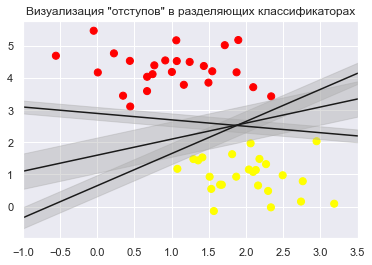

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)
plt.title('Визуализация "отступов" в разделяющих классификаторах');

В методе опорных векторов в качестве оптимальной модели выбирается линия, максимизирующая этот отступ. Метод опорных векторов - пример оценивателя *с максимальным отступом* (maximum margin estimator).
### Аппроксимация методом опорных векторов
Взглянем на реальную аппроксимацию этих данных: воспользуемся классификатором на основе метода опорных векторов для обучения SVM - модели на них. Пока мы будем использовать линейное ядро и зададим очень большое значение **С**:

In [4]:
from sklearn.svm import SVC # "Классификатор на основе метода опорных векторов"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Строим график решающей функции для двумерной SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Создаем координатную сетку для оценки модели
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Рисуем границы принятия решений и отступы
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Рисуем опорные векторы
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

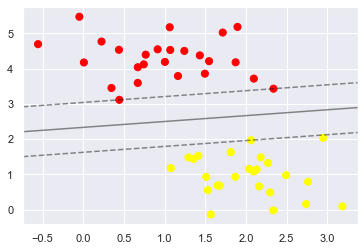

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);
# Обучение классификатора на основе метода опорных векторов.
# На рисунке показаны границы отступов (штриховые линии) и опорные векторы (окружности)

Эта разделяющая линия максимизирует отступ между двумя наборами точек. Обратите внимание, что некоторые из обучающих точек лишь касаются отступа. Они и называются опорными векторами. Данные об этих точках хранятся здесь:

In [7]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Остальные точки, кроме опорных векторов, не влияют на работу алгоритма. Пример:

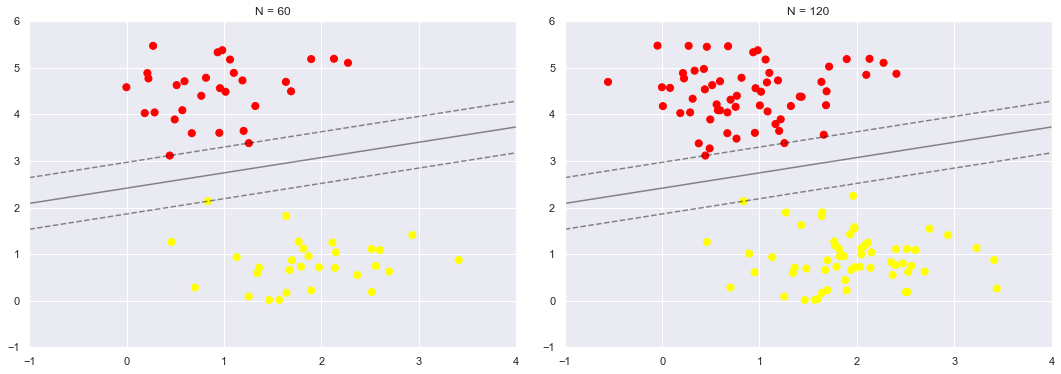

In [8]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [9]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));
# Интерактивный просмотр этой возможной модели SVM:

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

### Выходим за границы линейности: SVM-ядро
Возможности метода SVM особенно расширяются при его комбинации с *ядрами* (kernels). Чтобы понять, зачем здесь нужны ядра, рассмотрим следующие данные, которые не допускают линейное разделение:

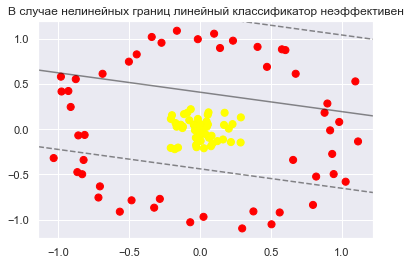

In [10]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)
plt.title('В случае нелинейных границ линейный классификатор неэффективен');

Очевидно, что эти данные *никаким образом* линейно не разделимы. Попытаемся спроецировать эти данные в пространство более высокой размерности, поэтому линейного разделителя будет достаточно. Например, одна из подходящих простых проекций - вычисление *радиальной базисной функции*, центрированной посередине совокупности данных:

In [11]:
r = np.exp(-(X ** 2).sum(1))

Визуализировать это дополнительное измерение данных можно с помощью трехмерного графика:

In [12]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 25, 90], azip=(-180, 180), X=fixed(X), y=fixed(y));
# Добавление в данные третьего измерения дает возможность линейного разделения

interactive(children=(Dropdown(description='elev', options=(-90, 25, 90), value=-90), IntSlider(value=30, desc…

Потенциальная проблема методики *проекции N точек на N измерений* - состоит в том, что при росте N она может потребовать колоссальных объемов вычислений. Однако, благодаря процедуре "*Ядерный метод*" *kernel trick*, обучение на преобразованных с помощью ядра данных можно произвести неявно, даже без построения полного N-мерного представления ядерной проекции! Ядерный метод является частью SVM. В библиотеке Scikit-Learn, чтобы применить алгоритм SVM с использованием ядерного преобразования, достаточно просто заменить линейное ядро на ядро RBF ("радиальная базисная функция") с помощью гиперпараметра модели kernel:

In [13]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

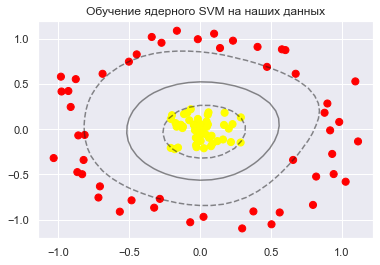

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')
plt.title('Обучение ядерного SVM на наших данных');

## Настройка SVM: размытие отступов
Что если данные в некоторой степени перекрываются, как здесь:

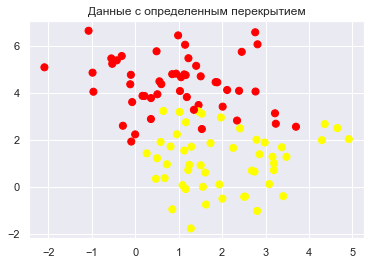

In [15]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.title('Данные с определенным перекрытием');

На этот случай в реализации метода SVM есть небольшой поправочный параметр для "размытия" отступа. Данный параметр разрешает некоторым точкам "заходить" на отступы в тех случаях, когда это приводит к лучшей аппроксимации. Степень размытости отступа определяется настроечным параметром **С**. При небольшом значении **С** отступ является "жестким" и точки не могут находиться на нем. При меньшем значении отступ становится более размытым и может включать в себя некоторые точки.

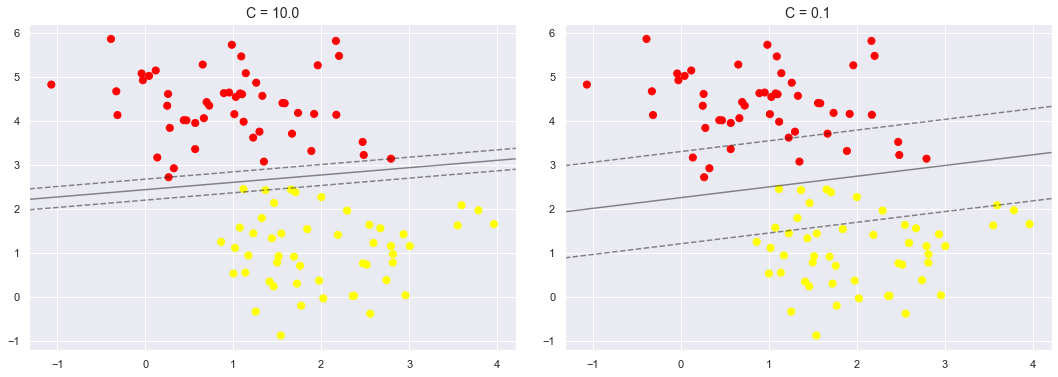

In [16]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Оптимальное значение параметра **С** зависит от конкретного набора данных. Его следует настраивать с помощью перекрестной проверки и т.д.
## Резюме по методу опорных векторов
***Плюсы:***

• Зависимость их от относительно небольшого количества опорных векторов означает компактность модели и небольшое количество используемой оперативной памяти.

• Фаза предсказания после обучения модели занимает очень мало времени.

• Поскольку на работу этих методов влияют только точки, находящиеся возле отступа, они хорошо подходят для многомерных данных - даже данных с количеством измерений большим, чем количество выборок, - непростые условия работы для других алгоритмов.

• Интеграция с ядерными методами делает их универсальными, обеспечивает приспособляемость к множеству типов данных.

***Недостатки:***

• Они масштабируются при количестве выборок N в наихудшем случае как O[N^3] (O[N^2] для более эффективных реализаций). При значительном количестве обучающих выборок вычислительные затраты могут оказаться непомерно высокими.

• Результаты зависят от удачности выбора параметра размытия **С**. Его необходимо тщательно выбирать с помощью перекрестной проверки, которая тоже может потребовать значительных вычислительных затрат при росте размеров наборов данных.

• У результатов отсутствует непосредственная вероятностная интерпретация. Ее можно получить путем внутренней перекрестной проверки, но эта дополнительная проверка обходится недешево в смысле вычислительных затрат.